# Resource Catalog

This notebook demostrates usage of the EODH resource catalog API using `pyeodh`.

EODH provides STAC API, which you can search and use it to retrieve catalogs, collections, items or assets. This client can be used to fetch both public datasets and also private from user specific workspaces.


First we need to instantiate the pyeodh client and get the resouce catalog entrypoint (root catalog).


In [1]:
import pyeodh

client = pyeodh.Client(
    base_url="https://test.eodatahub.org.uk"
)  # Optionally specify a different server
service = client.get_catalog_service()

There can be many catalogs nested within other catalogs. You can either fetch all catalogs using `get_catalogs()` and iterate over the resulting list or fetch a specific catalog using it's ID (path from the root catalog, if the catalog is nested in another one) in `get_catalog()`. See the [web UI](https://test.eodatahub.org.uk/catalogue) to gain more insight into the resource catalog structure.


In [20]:
catalogs = service.get_catalogs()
ceda_cat = service.get_catalog("supported-datasets/ceda-stac-fastapi")

For all types of records, all attributes are mapped to class properties and can be accessed as shown below. See [pyeodh documentation](https://pyeodh.readthedocs.io) or use your editor's intellisense to find available properties. Let's see what catalogs are currently available to us.


In [21]:
for cat in catalogs:
    print("id: ", cat.id)
    print("title: ", cat.title)
    print("description: ", cat.description)
    print("")

id:  093927f4-12ad-11ef-94e9-7e375e8a9c97
title:  
description:  Root catalog

id:  0fcb2296-2411-11ef-bcbd-da6b61b15d6d
title:  
description:  Root catalog

id:  1440d164-1376-11ef-b8ab-e20b664dd0f8
title:  
description:  Root catalog

id:  93cdafea-1dc8-11ef-968f-6a7abc48984c
title:  
description:  Root catalog

id:  97d80a3c-1dc7-11ef-92a3-6a7abc48984c
title:  
description:  Root catalog

id:  ad608ce4-1d0e-11ef-8036-563e2ce721d4
title:  
description:  Root catalog

id:  agstephens
title:  Workflow Output Catalogs
description:  Workflow outputs in the agstephens workspace

id:  agstephens
title:  Catalog for workspace agstephens
description:  Datasets in the agstephens workspace

id:  ajgwords
title:  Workflow Output Catalogs
description:  Workflow outputs in the ajgwords workspace

id:  ajgwords
title:  Catalog for workspace ajgwords
description:  Datasets in the ajgwords workspace



Catalogs can hold other catalogs or collections, let's grab a collection from a catalog. Again we can either fetch all collections using `Catalog.get_collections()` or in this case a specific one identified by it's ID.


In [22]:
cmip6 = ceda_cat.get_collection("cmip6")

We can grab all items from a collection using `Collection.get_items()` or a specific one using `Collection.get_item()` if we know it's ID.


In [23]:
item = cmip6.get_item(
    "CMIP6.ScenarioMIP.THU.CIESM.ssp585.r1i1p1f1.Amon.rsus.gr.v20200806"
)
print(item.id)

CMIP6.ScenarioMIP.THU.CIESM.ssp585.r1i1p1f1.Amon.rsus.gr.v20200806


`Collection.get_items()` does not actually fetch all items at once, it uses a generator to lazy load items one page at a time. Paginated responses can be simply iterated over like so.

Note: `total_count` is sometimes not provided by the api, which will result only in a warning when accessed.


In [25]:
items = cmip6.get_items()
print(items.total_count)
for item in items:
    print(item.id)

10
CMIP6.ScenarioMIP.THU.CIESM.ssp585.r1i1p1f1.Amon.rsus.gr.v20200806
CMIP6.ScenarioMIP.THU.CIESM.ssp585.r1i1p1f1.Amon.rlus.gr.v20200806
CMIP6.ScenarioMIP.CSIRO.ACCESS-ESM1-5.ssp126.r1i1p1f1.day.uas.gn.v20210318
CMIP6.ScenarioMIP.CSIRO-ARCCSS.ACCESS-CM2.ssp585.r1i1p1f1.day.pr.gn.v20210317
CMIP6.ScenarioMIP.CSIRO-ARCCSS.ACCESS-CM2.ssp126.r1i1p1f1.day.pr.gn.v20210317
CMIP6.ScenarioMIP.CSIRO.ACCESS-ESM1-5.ssp585.r1i1p1f1.day.rsds.gn.v20210318
CMIP6.ScenarioMIP.CSIRO.ACCESS-ESM1-5.ssp585.r1i1p1f1.day.hurs.gn.v20210318
CMIP6.ScenarioMIP.CSIRO-ARCCSS.ACCESS-CM2.ssp585.r1i1p1f1.day.tas.gn.v20210317
CMIP6.ScenarioMIP.CSIRO-ARCCSS.ACCESS-CM2.ssp585.r1i1p1f1.day.psl.gn.v20210317
CMIP6.ScenarioMIP.CSIRO-ARCCSS.ACCESS-CM2.ssp126.r1i1p1f1.day.tasmin.gn.v20210317


If we know the URL of a specific Item/Collection/Catalog, we can directly initialize the object from the URL using `from_href()` class method, which is available for all classes representing EODH API objects.


In [3]:
from pyeodh.resource_catalog import Item

item = Item.from_href(
    client,
    "https://test.eodatahub.org.uk/api/catalogue/stac/catalogs/supported-datasets/ceda-stac-catalogue/collections/sentinel2_ard/items/neodc.sentinel_ard.data.sentinel_2.2023.11.20.S2A_20231120_latn501lonw0036_T30UVA_ORB037_20231120132420_utm30n_osgb",
)
print(item.id)

neodc.sentinel_ard.data.sentinel_2.2023.11.20.S2A_20231120_latn501lonw0036_T30UVA_ORB037_20231120132420_utm30n_osgb


The API provides a ping endpoint, which we can use to for a cheap livecheck.


In [26]:
print(f"Livecheck: PING-{service.ping()}")

Livecheck: PING-PONG


We can check specifications the API claims confromance to, either by calling `CatalogService.get_conformance()` (makes request to conformance endpoint) or accessing property `Catalog.conforms_to` (uses stored data provided by API when fetching a catalog).


In [27]:
print("API conforms to:", *service.get_conformance(), sep="\n")

API conforms to:
https://api.stacspec.org/v1.0.0-rc.2/item-search#filter
https://api.stacspec.org/v1.0.0/item-search#query
https://api.stacspec.org/v1.0.0/item-search
http://www.opengis.net/spec/ogcapi-features-3/1.0/conf/features-filter
http://www.opengis.net/spec/ogcapi-common-2/1.0/conf/simple-query
http://www.opengis.net/spec/cql2/1.0/conf/cql2-text
https://api.stacspec.org/v1.0.0/collections
http://www.opengis.net/spec/ogcapi-features-1/1.0/conf/geojson
http://www.opengis.net/spec/ogcapi-features-3/1.0/conf/filter
https://api.stacspec.org/v1.0.0-rc.1/core
https://api.stacspec.org/v1.0.0/ogcapi-features
http://www.opengis.net/spec/cql2/1.0/conf/cql2-json
http://www.opengis.net/spec/ogcapi-features-1/1.0/conf/core
https://api.stacspec.org/v1.0.0-rc.2/item-search#context
http://www.opengis.net/spec/cql2/1.0/conf/advanced-comparison-operators
http://www.opengis.net/spec/ogcapi-features-1/1.0/conf/oas30
/catalogues
https://api.stacspec.org/v1.0.0/item-search#sort
http://www.opengis.net

To avoid iterating over catalogs, collections and items in search of a specific item, use `Catalog.search()`.

Note: `CatalogService` is an extension of `Catalog` class, therefore this method is available for both. See neighbouring ceda-rc.ipynb notebook for more advanced search uses.


In [28]:
for result in service.search(
    collections=["cmip6"], catalog_paths=["supported-datasets/ceda-stac-fastapi"]
):
    print(result.id)

CMIP6.ScenarioMIP.THU.CIESM.ssp585.r1i1p1f1.Amon.rsus.gr.v20200806
CMIP6.ScenarioMIP.THU.CIESM.ssp585.r1i1p1f1.Amon.rlus.gr.v20200806
CMIP6.ScenarioMIP.CSIRO.ACCESS-ESM1-5.ssp126.r1i1p1f1.day.uas.gn.v20210318
CMIP6.ScenarioMIP.CSIRO-ARCCSS.ACCESS-CM2.ssp585.r1i1p1f1.day.pr.gn.v20210317
CMIP6.ScenarioMIP.CSIRO-ARCCSS.ACCESS-CM2.ssp126.r1i1p1f1.day.pr.gn.v20210317
CMIP6.ScenarioMIP.CSIRO.ACCESS-ESM1-5.ssp585.r1i1p1f1.day.rsds.gn.v20210318
CMIP6.ScenarioMIP.CSIRO.ACCESS-ESM1-5.ssp585.r1i1p1f1.day.hurs.gn.v20210318
CMIP6.ScenarioMIP.CSIRO-ARCCSS.ACCESS-CM2.ssp585.r1i1p1f1.day.tas.gn.v20210317
CMIP6.ScenarioMIP.CSIRO-ARCCSS.ACCESS-CM2.ssp585.r1i1p1f1.day.psl.gn.v20210317
CMIP6.ScenarioMIP.CSIRO-ARCCSS.ACCESS-CM2.ssp126.r1i1p1f1.day.tasmin.gn.v20210317


The resouce catalog client is based on the [PySTAC library](https://github.com/stac-utils/pystac). All attributes provided by the API are mapped to class properties and can be easily accessed as shown at the top of this notebook. In case you want to utilize some functionality from pystac which is not directly available in pyeodh classes, you can access the underlying PySTAC object using `_pystac_object` attribute. For example dump an item into a plain dictionary.


In [29]:
import json

jsonstring = json.dumps(item._pystac_object.to_dict())
print(jsonstring)

{"type": "Feature", "stac_version": "1.0.0", "id": "CMIP6.ScenarioMIP.CSIRO-ARCCSS.ACCESS-CM2.ssp126.r1i1p1f1.day.tasmin.gn.v20210317", "properties": {"datetime": "2251-01-01T00:00:00Z", "start_datetime": "2201-01-01T12:00:00Z", "end_datetime": "2300-12-31T12:00:00Z", "access": ["HTTPServer"], "index_node": null, "latest": true, "pid": null, "replica": false, "retracted": false, "instance_id": "CMIP6.ScenarioMIP.CSIRO-ARCCSS.ACCESS-CM2.ssp126.r1i1p1f1.day.tasmin.gn.v20210317", "citation_url": "http:/cera-www.dkrz.de/WDCC/meta/CMIP6/CMIP6.ScenarioMIP.CSIRO-ARCCSS.ACCESS-CM2.ssp126.r1i1p1f1.day.tasmin.gn.v20210317.json", "variable_long_name": "Daily Minimum Near-Surface Air Temperature", "variable_units": "K", "cf_standard_name": "air_temperature", "activity_id": "ScenarioMIP", "data_specs_version": "01.00.30", "experiment_title": "update of RCP2.6 based on SSP1", "frequency": "day", "further_info_url": "https://furtherinfo.es-doc.org/CMIP6.CSIRO-ARCCSS.ACCESS-CM2.ssp126.none.r1i1p1f1", 

In [8]:
# number of collections in each catalog
cat_stats = {}
for cat in catalogs:
    cat_stats[cat.id] = len(cat.get_collections())

print(cat_stats)

col_stats = {}
for col in service.get_collections():
    print(col.id, col.get_items().total_count)
    col_stats[col.id] = col.get_items().total_count or 0
print(col_stats)

{'093927f4-12ad-11ef-94e9-7e375e8a9c97': 1, '0fcb2296-2411-11ef-bcbd-da6b61b15d6d': 1, '1440d164-1376-11ef-b8ab-e20b664dd0f8': 1, '93cdafea-1dc8-11ef-968f-6a7abc48984c': 1, '97d80a3c-1dc7-11ef-92a3-6a7abc48984c': 1, 'ad608ce4-1d0e-11ef-8036-563e2ce721d4': 1, 'ceda-stac-fastapi': 5, 'earth-search-aws': 8, 'sgillies-tpzuk': 0, 'tjellicoe-tpzuk': 0}
cmip6 10
cordex 10
ukcp 10
0fcb2296-2411-11ef-bcbd-da6b61b15d6d 1
93cdafea-1dc8-11ef-968f-6a7abc48984c 1
97d80a3c-1dc7-11ef-92a3-6a7abc48984c 1
ad608ce4-1d0e-11ef-8036-563e2ce721d4 1
1440d164-1376-11ef-b8ab-e20b664dd0f8 1
093927f4-12ad-11ef-94e9-7e375e8a9c97 1
sentinel2_ard 10
{'cmip6': 10, 'cordex': 10, 'ukcp': 10, '0fcb2296-2411-11ef-bcbd-da6b61b15d6d': 1, '93cdafea-1dc8-11ef-968f-6a7abc48984c': 1, '97d80a3c-1dc7-11ef-92a3-6a7abc48984c': 1, 'ad608ce4-1d0e-11ef-8036-563e2ce721d4': 1, '1440d164-1376-11ef-b8ab-e20b664dd0f8': 1, '093927f4-12ad-11ef-94e9-7e375e8a9c97': 1, 'sentinel2_ard': 10}


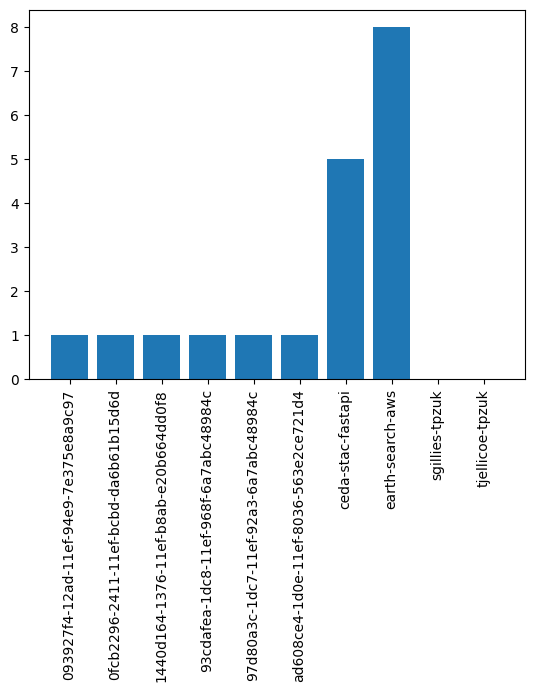

In [9]:
import matplotlib.pyplot as plt

plt.bar(cat_stats.keys(), cat_stats.values())
plt.xticks(rotation=90)
plt.show()

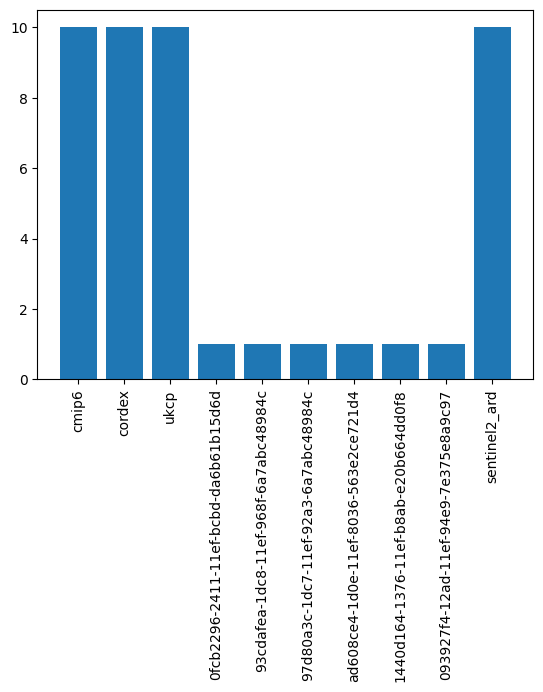

In [10]:
plt.bar(col_stats.keys(), col_stats.values())
plt.xticks(rotation=90)
plt.show()

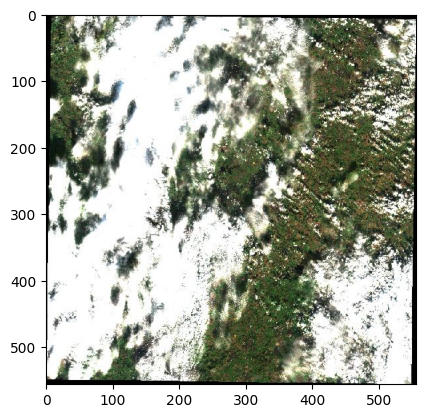

In [11]:
sentinel2ard_item = ceda_cat.get_collection("sentinel2_ard").get_item(
    "neodc.sentinel_ard.data.sentinel_2.2023.11.20.S2A_20231120_latn519lonw0022_T30UWC_ORB037_20231120132420_utm30n_osgb"
)
image_url = sentinel2ard_item.assets["thumbnail"].href

import matplotlib.pyplot as plt
import urllib
import numpy as np
from PIL import Image

# Some magic using pillow and urllib to open the remote jpg as a file handle in memory
image = np.array(Image.open(urllib.request.urlopen(image_url)))

plt.imshow(image)